# Data Exploration & Preprocessing

Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`


# Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Bước 1 - Đọc dữ liệu

Đọc dữ liệu từ file CSV và loại bỏ các bản ghi trùng lặp để đảm bảo chất lượng dữ liệu.


In [3]:
# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")

# Loại bỏ dữ liệu trùng lặp
df = df.drop_duplicates()

print("Kích thước dữ liệu sau khi loại bỏ trùng lặp:", df.shape)
df.head()


Kích thước dữ liệu sau khi loại bỏ trùng lặp: (5425, 15)


,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,91.7,94.488806,2.965073,0.0,NaN
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,100.0,94.770491,2.969193,NaN,NaN
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,100.0,95.052176,3.221322,0.0,NaN
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,100.0,95.333861,3.671291,NaN,NaN
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,100.0,95.615545,3.667304,0.0,NaN


## Bước 2 - Tổng quan dữ liệu

Phân tích cấu trúc dữ liệu, kiểu dữ liệu và ý nghĩa của từng thuộc tính. Rút ngắn tên các cột để dễ dàng trong việc phân tích và trực quan hóa.


In [4]:
# Rút ngắn tên các cột để dễ phân tích
df.columns = [
    'country_name', 'country_code', 'year', 'population', 'poverty_ratio',
    'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth',
    'sanitation', 'electricity', 'water_access', 'co2_emissions',
    'slum_population', 'labor_force'
]

print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số quốc gia: {df['country_name'].nunique()}")
print(f"Khoảng thời gian: {df['year'].min()}-{df['year'].max()}")

print("\nÝ NGHĨA CÁC THUỘC TÍNH:")
print("1. country_name: Tên quốc gia")
print("2. country_code: Mã quốc gia")
print("3. year: Năm")
print("4. population: Tổng dân số")
print("5. poverty_ratio: Tỷ lệ nghèo (% dân số)")
print("6. pop_growth: Tăng trưởng dân số hàng năm (%)")
print("7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET")
print("8. gdp_per_capita: GDP bình quân đầu người (USD)")
print("9. gdp_growth: Tăng trưởng GDP hàng năm (%)")
print("10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)")
print("11. electricity: Tỷ lệ tiếp cận điện (%)")
print("12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)")
print("13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)")
print("14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)")
print("15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)")

print("\nTHÔNG TIN DỮ LIỆU:")
df.info()


THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:
Kích thước dữ liệu: (5425, 15)
Số quốc gia: 217
Khoảng thời gian: 2000-2024

Ý NGHĨA CÁC THUỘC TÍNH:
1. country_name: Tên quốc gia
2. country_code: Mã quốc gia
3. year: Năm
4. population: Tổng dân số
5. poverty_ratio: Tỷ lệ nghèo (% dân số)
6. pop_growth: Tăng trưởng dân số hàng năm (%)
7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET
8. gdp_per_capita: GDP bình quân đầu người (USD)
9. gdp_growth: Tăng trưởng GDP hàng năm (%)
10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)
11. electricity: Tỷ lệ tiếp cận điện (%)
12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)
13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)
14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)
15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)

THÔNG TIN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -----

## Bước 3 - Phân tích giá trị thiếu & tương quan

Phân tích các giá trị thiếu và mối tương quan giữa các biến, đặc biệt với GDP. Quyết định giữ lại hay loại bỏ các cột dựa trên mức độ thiếu dữ liệu và tương quan.


PHÂN TÍCH GIÁ TRỊ THIẾU:
country_name          0
country_code          0
year                  0
population            0
poverty_ratio      3591
pop_growth            1
life_expectancy     217
gdp_per_capita      212
gdp_growth          284
sanitation         2308
electricity         290
water_access        648
co2_emissions       553
slum_population    3410
labor_force         759
dtype: int64

PHÂN TÍCH CHI TIẾT:
Các cột có nhiều giá trị thiếu:
poverty_ratio      3591
slum_population    3410
sanitation         2308
dtype: int64

Tương quan với GDP per capita:
gdp_per_capita     1.000000
sanitation         0.603276
life_expectancy    0.582232
water_access       0.418110
electricity        0.377015
co2_emissions      0.353764
year               0.141477
labor_force        0.121447
population        -0.064516
gdp_growth        -0.075054
pop_growth        -0.085507
poverty_ratio     -0.384523
slum_population   -0.470624
Name: gdp_per_capita, dtype: float64

QUYẾT ĐỊNH XỬ LÝ:
- poverty_ra

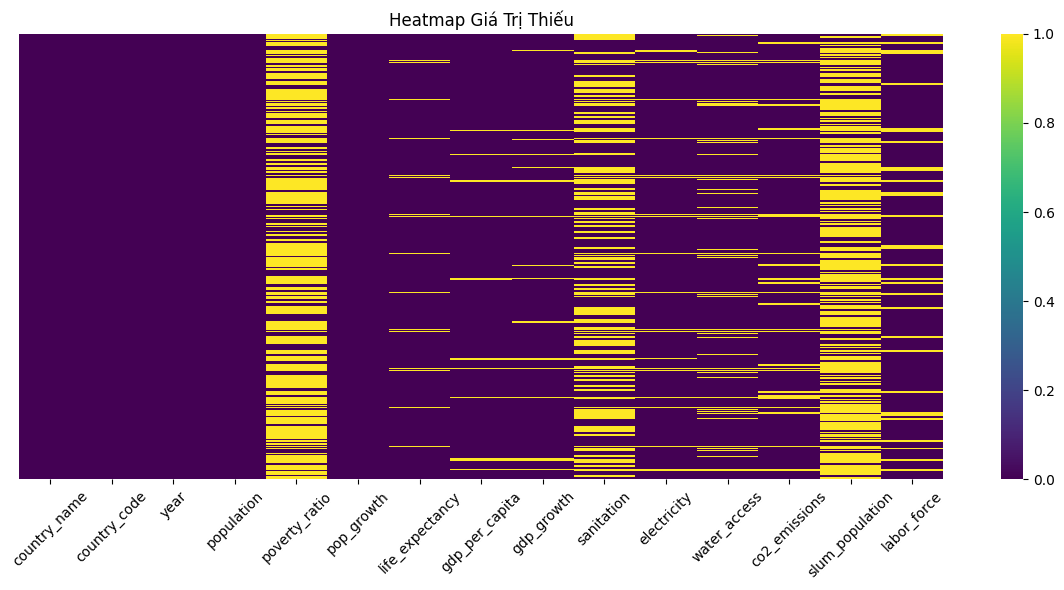

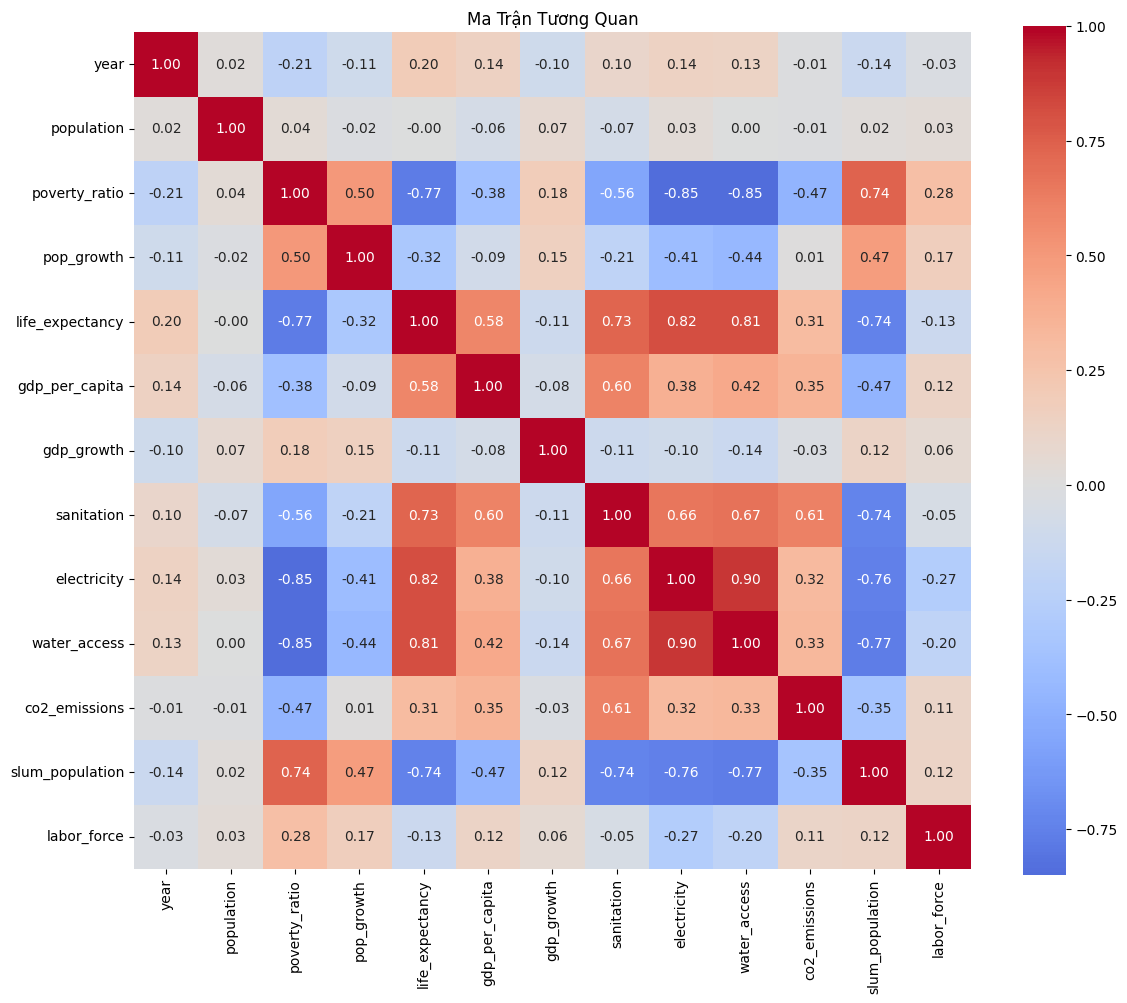

In [5]:
# Phân tích giá trị thiếu
print("PHÂN TÍCH GIÁ TRỊ THIẾU:")
missing_values = df.isnull().sum()
print(missing_values)

# Vẽ heatmap giá trị thiếu
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Heatmap Giá Trị Thiếu')
plt.xticks(rotation=45)
plt.tight_layout()

# Phân tích tương quan với GDP
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Ma Trận Tương Quan')
plt.tight_layout()

# Phân tích chi tiết
print("\nPHÂN TÍCH CHI TIẾT:")
print("Các cột có nhiều giá trị thiếu:")
high_missing = missing_values[missing_values > 1000].sort_values(ascending=False)
print(high_missing)

print("\nTương quan với GDP per capita:")
gdp_corr = correlation_matrix['gdp_per_capita'].sort_values(ascending=False)
print(gdp_corr)

# Quyết định loại bỏ cột
print("\nQUYẾT ĐỊNH XỬ LÝ:")
print("- poverty_ratio: 3591 giá trị thiếu (66%) - loại bỏ")
print("- slum_population: 3410 giá trị thiếu (63%) - loại bỏ") 
print("- sanitation: 2308 giá trị thiếu (43%) - loại bỏ")
print("- labor_force: 759 giá trị thiếu (14%) - giữ lại")
print("- water_access: 648 giá trị thiếu (12%) - giữ lại")
print("- co2_emissions: 553 giá trị thiếu (10%) - giữ lại")
print("- gdp_growth: 284 giá trị thiếu (5%) - giữ lại")
print("- electricity: 290 giá trị thiếu (5%) - giữ lại")
print("- life_expectancy: 217 giá trị thiếu (4%) - giữ lại (TARGET)")
print("- gdp_per_capita: 212 giá trị thiếu (4%) - giữ lại")
print("- pop_growth: 1 giá trị thiếu (<1%) - giữ lại")

# Loại bỏ các cột có quá nhiều giá trị thiếu
cols_to_drop = ['poverty_ratio', 'slum_population', 'sanitation']
df = df.drop(columns=cols_to_drop)
print(f"\nĐã loại bỏ {len(cols_to_drop)} cột có nhiều giá trị thiếu")
print(f"Kích thước dữ liệu sau khi loại bỏ: {df.shape}")


## Bước 4 - Phân tích outlier

Phân tích các giá trị ngoại lai bằng boxplot và histogram để quyết định phương pháp điền giá trị thiếu phù hợp. Cột có nhiều outlier sẽ dùng median, ít outlier dùng mean.


PHÂN TÍCH OUTLIER CHO CÁC CỘT SỐ:
Các cột phân tích: ['population', 'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth', 'electricity', 'water_access', 'co2_emissions', 'labor_force']

TỶ LỆ OUTLIER CHO TỪNG CỘT:
population: 623 outliers (11.5%) - Median
pop_growth: 131 outliers (2.4%) - Mean
life_expectancy: 54 outliers (1.0%) - Mean
gdp_per_capita: 428 outliers (8.2%) - Mean
gdp_growth: 344 outliers (6.7%) - Mean
electricity: 454 outliers (8.8%) - Mean
water_access: 335 outliers (7.0%) - Mean
co2_emissions: 332 outliers (6.8%) - Mean
labor_force: 134 outliers (2.9%) - Mean

QUYẾT ĐỊNH PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU:
Theo boxplot, cột nào nhiều outlier sẽ fill median, ít outlier fill mean.
- population: median (tỷ lệ outlier: 11.5%)
- pop_growth: mean (tỷ lệ outlier: 2.4%)
- life_expectancy: mean (tỷ lệ outlier: 1.0%)
- gdp_per_capita: mean (tỷ lệ outlier: 8.2%)
- gdp_growth: mean (tỷ lệ outlier: 6.7%)
- electricity: mean (tỷ lệ outlier: 8.8%)
- water_access: mean (tỷ lệ o

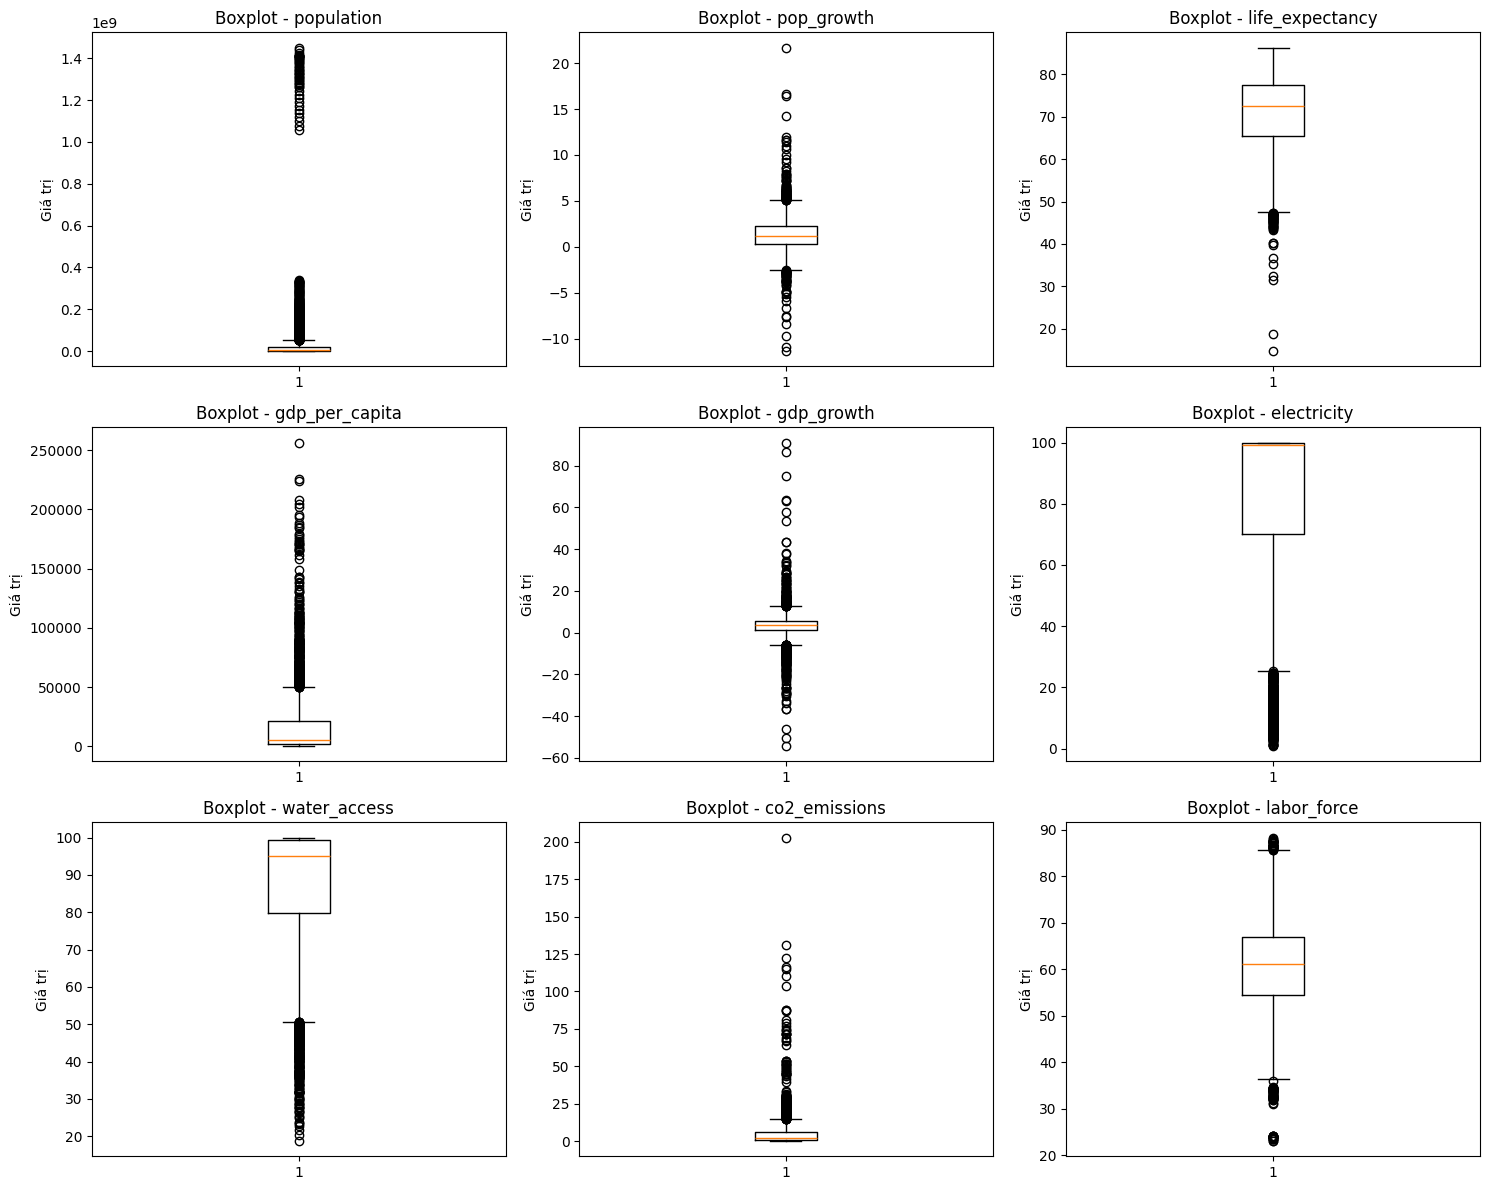

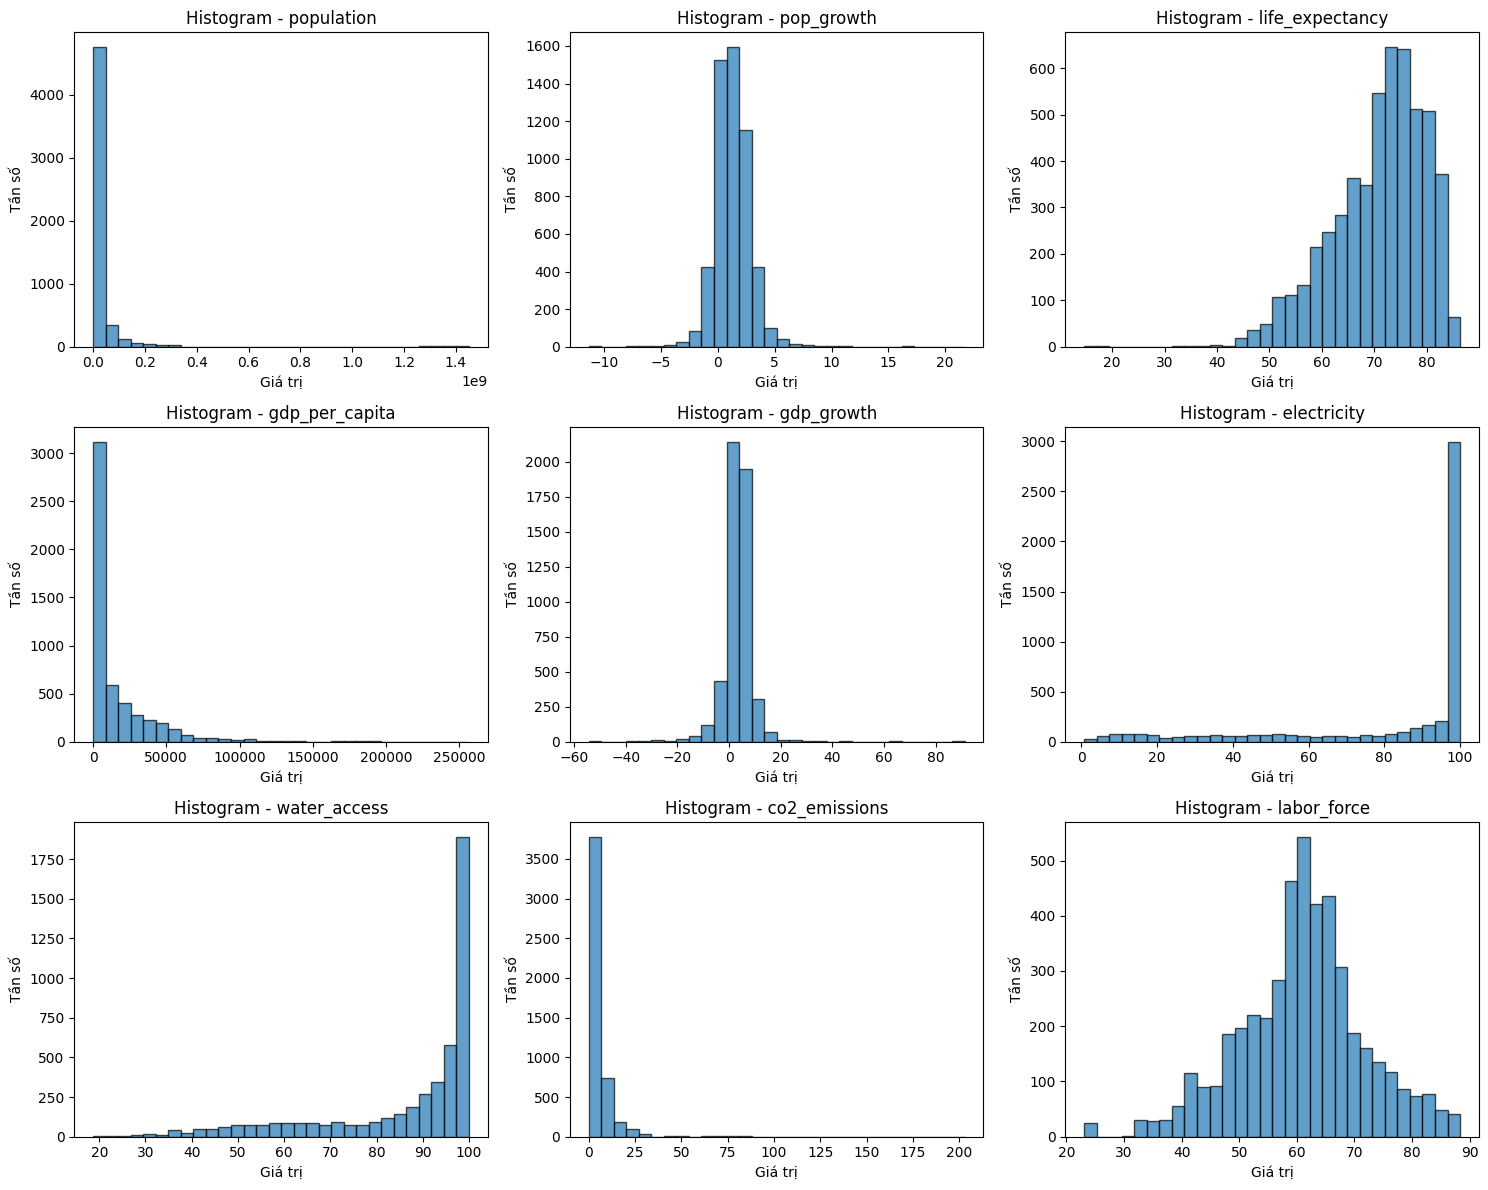

In [6]:
# Phân tích outlier cho các cột số
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'year' in numeric_columns:
    numeric_columns.remove('year')

print("PHÂN TÍCH OUTLIER CHO CÁC CỘT SỐ:")
print(f"Các cột phân tích: {numeric_columns}")

# Vẽ boxplot và histogram
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.ravel() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        # Boxplot
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Boxplot - {col}')
        axes[i].set_ylabel('Giá trị')

plt.tight_layout()

# Vẽ histogram
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.ravel() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        # Histogram
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Histogram - {col}')
        axes[i].set_xlabel('Giá trị')
        axes[i].set_ylabel('Tần số')

plt.tight_layout()

# Tính tỷ lệ outlier cho từng cột
print("\nTỶ LỆ OUTLIER CHO TỪNG CỘT:")
outlier_analysis = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_ratio = len(outliers) / len(df[col].dropna()) * 100
    
    outlier_analysis[col] = {
        'outlier_count': len(outliers),
        'outlier_ratio': outlier_ratio,
        'use_median': outlier_ratio > 10  # Nếu >10% outlier thì dùng median
    }
    
    print(f"{col}: {len(outliers)} outliers ({outlier_ratio:.1f}%) - {'Median' if outlier_ratio > 10 else 'Mean'}")

print("\nQUYẾT ĐỊNH PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU:")
print("Theo boxplot, cột nào nhiều outlier sẽ fill median, ít outlier fill mean.")
for col, analysis in outlier_analysis.items():
    method = "median" if analysis['use_median'] else "mean"
    print(f"- {col}: {method} (tỷ lệ outlier: {analysis['outlier_ratio']:.1f}%)")


## Bước 5 - Điền giá trị thiếu

Dựa trên phân tích outlier ở bước trước, điền giá trị thiếu bằng median cho các cột có nhiều outlier, mean cho các cột ít outlier.


In [7]:
# Điền giá trị thiếu dựa trên phân tích outlier
print("ĐIỀN GIÁ TRỊ THIẾU:")
print("Trước khi điền:")
print("Số giá trị thiếu:", df.isna().sum().sum())
print("Số dòng có dữ liệu:", df.count().min())

# Điền giá trị thiếu cho từng cột
for col in numeric_columns:
    if df[col].isna().any():
        if outlier_analysis[col]['use_median']:
            fill_value = df[col].median()
            method = "median"
        else:
            fill_value = df[col].mean()
            method = "mean"
        
        df[col].fillna(fill_value, inplace=True)
        print(f"- {col}: điền {method} = {fill_value:.2f}")

print("\nSau khi điền:")
print("Số giá trị thiếu:", df.isna().sum().sum())
print("Số dòng có dữ liệu:", df.count().min())

print("\nDữ liệu không còn NaN sau xử lý.")
print("Kiểm tra chi tiết:")
print(df.isna().sum())
print("\nSố dòng dữ liệu đầy đủ:")
print(df.count())


ĐIỀN GIÁ TRỊ THIẾU:
Trước khi điền:
Số giá trị thiếu: 2964
Số dòng có dữ liệu: 4666
- pop_growth: điền mean = 1.29
- life_expectancy: điền mean = 70.89
- gdp_per_capita: điền mean = 16144.77
- gdp_growth: điền mean = 3.36
- electricity: điền mean = 81.52
- water_access: điền mean = 86.33
- co2_emissions: điền mean = 4.88
- labor_force: điền mean = 60.90

Sau khi điền:
Số giá trị thiếu: 0
Số dòng có dữ liệu: 5425

Dữ liệu không còn NaN sau xử lý.
Kiểm tra chi tiết:
country_name       0
country_code       0
year               0
population         0
pop_growth         0
life_expectancy    0
gdp_per_capita     0
gdp_growth         0
electricity        0
water_access       0
co2_emissions      0
labor_force        0
dtype: int64

Số dòng dữ liệu đầy đủ:
country_name       5425
country_code       5425
year               5425
population         5425
pop_growth         5425
life_expectancy    5425
gdp_per_capita     5425
gdp_growth         5425
electricity        5425
water_access       5425
c

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16124\3316674295.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)


## Bước 6 - Chia dữ liệu thành 4 tập riêng biệt

Chia dữ liệu thành X_train, X_test, y_train, y_test để dự đoán tuổi thọ (life_expectancy). Lưu từng tập dữ liệu riêng biệt vào thư mục data/processed/.


In [8]:
from sklearn.model_selection import train_test_split
import os

# Chuẩn bị dữ liệu cho mô hình
# Target: life_expectancy (tuổi thọ)
target = 'life_expectancy'

# Features: tất cả các cột số trừ target và year
feature_cols = [col for col in numeric_columns if col != target]

print("CHIA DỮ LIỆU CHO MÔ HÌNH DỰ ĐOÁN TUỔI THỌ:")
print(f"Target: {target}")
print(f"Features: {feature_cols}")

# Tạo X (features) và y (target)
X = df[feature_cols]
y = df[target]

# Chia dữ liệu train/test với shuffle=True (90-10)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=True
)

print(f"\nKích thước dữ liệu:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Tạo thư mục processed nếu chưa có
os.makedirs('../data/processed', exist_ok=True)

# Lưu từng tập dữ liệu riêng biệt thành 4 file CSV
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print(f"\nĐã lưu 4 tập dữ liệu riêng biệt:")
print(f"- X_train: ../data/processed/X_train.csv ({len(X_train)} mẫu)")
print(f"- X_test: ../data/processed/X_test.csv ({len(X_test)} mẫu)")
print(f"- y_train: ../data/processed/y_train.csv ({len(y_train)} mẫu)")
print(f"- y_test: ../data/processed/y_test.csv ({len(y_test)} mẫu)")

print(f"\nTỷ lệ chia dữ liệu:")
print(f"Train: {len(X_train)/len(df)*100:.1f}%")
print(f"Test: {len(X_test)/len(df)*100:.1f}%")


CHIA DỮ LIỆU CHO MÔ HÌNH DỰ ĐOÁN TUỔI THỌ:
Target: life_expectancy
Features: ['population', 'pop_growth', 'gdp_per_capita', 'gdp_growth', 'electricity', 'water_access', 'co2_emissions', 'labor_force']

Kích thước dữ liệu:
X_train: (4882, 8)
X_test: (543, 8)
y_train: (4882,)
y_test: (543,)

Đã lưu 4 tập dữ liệu riêng biệt:
- X_train: ../data/processed/X_train.csv (4882 mẫu)
- X_test: ../data/processed/X_test.csv (543 mẫu)
- y_train: ../data/processed/y_train.csv (4882 mẫu)
- y_test: ../data/processed/y_test.csv (543 mẫu)

Tỷ lệ chia dữ liệu:
Train: 90.0%
Test: 10.0%


## Kiểm tra & Kết luận

Kiểm tra dữ liệu cuối cùng và đưa ra kết luận về quá trình tiền xử lý dữ liệu.


In [9]:
# Kiểm tra dữ liệu cuối cùng
print("KIỂM TRA DỮ LIỆU CUỐI CÙNG:")
print(f"Kích thước dữ liệu gốc: {df.shape}")
print(f"Kích thước dữ liệu train: {X_train.shape}")
print(f"Kích thước dữ liệu test: {X_test.shape}")

print("\nKiểm tra giá trị thiếu:")
print("Dữ liệu gốc:", df.isna().sum().sum())
print("Dữ liệu train:", X_train.isna().sum().sum())
print("Dữ liệu test:", X_test.isna().sum().sum())

print("\nKiểm tra dữ liệu trùng lặp:")
print("Dữ liệu gốc:", df.duplicated().sum())
print("Dữ liệu train:", X_train.duplicated().sum())
print("Dữ liệu test:", X_test.duplicated().sum())

print("\nThống kê mô tả target (life_expectancy):")
print("Train set:")
print(f"  Mean: {y_train.mean():.2f}")
print(f"  Std: {y_train.std():.2f}")
print(f"  Min: {y_train.min():.2f}")
print(f"  Max: {y_train.max():.2f}")

print("Test set:")
print(f"  Mean: {y_test.mean():.2f}")
print(f"  Std: {y_test.std():.2f}")
print(f"  Min: {y_test.min():.2f}")
print(f"  Max: {y_test.max():.2f}")

print("\nPhân bố target theo quốc gia (5 quốc gia đầu):")
country_target = df.groupby('country_name')['life_expectancy'].mean().sort_values(ascending=False)
print(country_target.head())

print("\nPhân bố target theo năm (5 năm đầu):")
year_target = df.groupby('year')['life_expectancy'].mean().sort_index()
print(year_target.head())


KIỂM TRA DỮ LIỆU CUỐI CÙNG:
Kích thước dữ liệu gốc: (5425, 12)
Kích thước dữ liệu train: (4882, 8)
Kích thước dữ liệu test: (543, 8)

Kiểm tra giá trị thiếu:
Dữ liệu gốc: 0
Dữ liệu train: 0
Dữ liệu test: 0

Kiểm tra dữ liệu trùng lặp:
Dữ liệu gốc: 0
Dữ liệu train: 0
Dữ liệu test: 0

Thống kê mô tả target (life_expectancy):
Train set:
  Mean: 70.85
  Std: 8.65
  Min: 14.66
  Max: 86.15
Test set:
  Mean: 71.26
  Std: 8.26
  Min: 46.05
  Max: 86.37

Phân bố target theo quốc gia (5 quốc gia đầu):
country_name
Monaco                  84.160198
Andorra                 82.967678
San Marino              82.841598
Hong Kong SAR, China    82.798715
Japan                   82.564412
Name: life_expectancy, dtype: float64

Phân bố target theo năm (5 năm đầu):
year
2000    67.599822
2001    67.941957
2002    68.229304
2003    68.559669
2004    68.892493
Name: life_expectancy, dtype: float64


## Kết luận

**Đã áp dụng loại trùng, xử lý thiếu/outlier, chuẩn hóa cột, chia dữ liệu train/test. Kết quả: dữ liệu sạch, sẵn sàng huấn luyện.**

### Tóm tắt quá trình xử lý:

1. **Loại bỏ trùng lặp**: Sử dụng `drop_duplicates()` để đảm bảo không có bản ghi trùng lặp
2. **Rút ngắn tên cột**: Đổi tên các cột dài thành tên ngắn gọn, dễ hiểu
3. **Phân tích giá trị thiếu**: Loại bỏ các cột có >40% giá trị thiếu (poverty_ratio, slum_population, sanitation)
4. **Phân tích outlier**: Sử dụng boxplot và histogram để xác định phương pháp điền giá trị thiếu
5. **Điền giá trị thiếu**: Dùng median cho cột nhiều outlier, mean cho cột ít outlier
6. **Chia dữ liệu**: Chia 90-10 cho train-test với target là life_expectancy
7. **Lưu dữ liệu**: Lưu thành 4 tập riêng biệt vào thư mục `data/processed/` để sử dụng cho các mô hình ML

### Dữ liệu cuối cùng:
- **X_train**: 4,882 mẫu (90%) - Features cho training
- **X_test**: 543 mẫu (10%) - Features cho testing  
- **y_train**: 4,882 mẫu (90%) - Target cho training
- **y_test**: 543 mẫu (10%) - Target cho testing
- **Features**: 8 biến dự đoán
- **Target**: life_expectancy (tuổi thọ trung bình)
- **Chất lượng**: Không có giá trị thiếu, không có trùng lặp
